In [1]:
import numpy as np
import matplotlib.pyplot as plt


The final probability matrix:
[8.43644290e-01 6.18934850e-02 2.92518443e-02 8.43654921e-03
 5.67637531e-02 1.00780705e-05]
Applied to Boston population:
[5.48368789e+05 4.02307653e+04 1.90136988e+04 5.48375698e+03
 3.68964395e+04 6.55074579e+00]


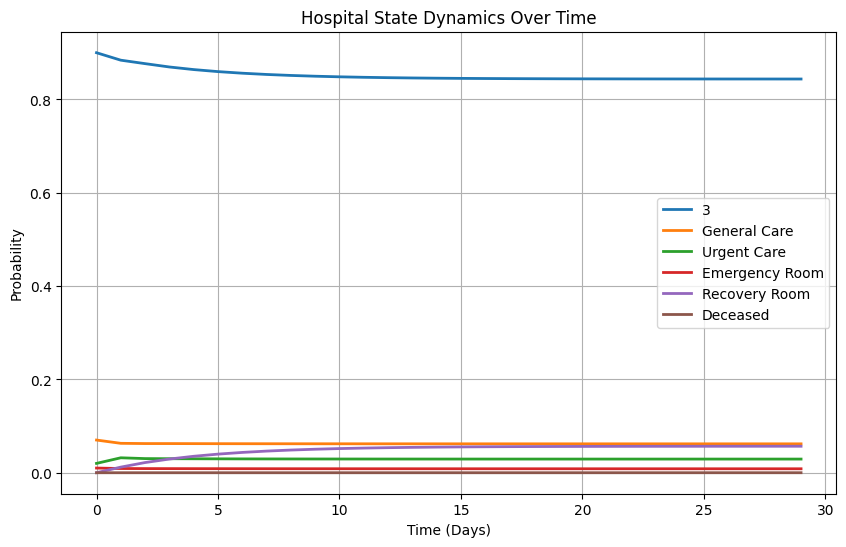

In [ ]:
# Non Covid, Expected State

# Three pointer, field goal, pocession lost, free throw, opponent three, opponent field goal, 
# opponenent pocession lost, opponent offensive rebound, opponent free throw
states = ["TP", "FG", "PL", "OR", "FT", "OTP", "OFG", "OPL", "OOR", "OFT"]
probabilities = np.array([0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0])  


transition_matrix = np.array([
    # TP    FG    PL    OR    FT   OTP  OFG  OPL  OOR  OFT
    [0,  0,  0,  0,  0, 0.0001, 0.25, 0.5, 0.14, 0.01, 0.1],  # TP
    [0,  0,  0,  0,  0, 0.0001, 0.25, 0.5, 0.14, 0.01, 0.1],  # FG
    [0,  0,  0,  0,  0, 0, 0.25, 0.5, 0.14, 0.01, 0.1],  # PL
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0],  # OR
    [0.00001, 0.00001, 0.5, 0.00001, 0.5, 0, 0, 0, 0, 0],  # FT 
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OTP
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OFG
    [0.25, 0.5, 0.14, 0.01, 0.1, 0, 0, 0, 0, 0], # OPL
    [0,  0,  0,  0,  0, 0, 0.25, 0.5, 0.14, 0.01, 0.1], # OOR
    [0.00001, 0.00001, 0.5, 0.00001, 0.5, 0, 0, 0, 0, 0], # OFT
])

# Evolving over time 
time = 30 
history = np.zeros((time, len(states)))

for i in range(time): 
    history[i] = probabilities
    probabilities = probabilities @ transition_matrix

print("The final probability matrix:")
print(probabilities)
print("Applied to Boston population:")
population = probabilities * 650000
print(population)

plt.figure(figsize=(10, 6))
for i, state in enumerate(states):
    plt.plot(range(time), history[:, i], label=state, linewidth=2)

plt.xlabel("Time (Days)")
plt.ylabel("Probability")
plt.title("Hospital State Dynamics Over Time")
plt.legend()
plt.grid(True)
plt.show()